In [1]:
from diagrams import Cluster, Diagram, Edge
from diagrams.onprem.analytics import Spark
from diagrams.onprem.queue import Kafka
from diagrams.onprem.database import Clickhouse
from diagrams.programming.language import Python
from diagrams.onprem.analytics import Metabase
from diagrams.onprem.container import Docker

with Diagram(show=False, filename='project_pipeline') as diag:

    with Cluster("Source",):
        sources = Python("Generator")
        sourceContainer = Docker()
    sourceQueue = Kafka()
        
    
    
    with Cluster("PreProcessing"):
        preprocessing = Spark("Anonimization")
        preprocessContainer = Docker()
    preprocessQueue = Kafka()
        
    
    with Cluster("Processing"):
        processing = Spark("enrichment \n session")
        processContainer = Docker()
    processQueue = Kafka()
        
    
    with Cluster("Storage"):
        ch = Clickhouse("Storing/Serving")
        chContainer = Docker()
    
    
    with Cluster("Visualisation"):
        dashboard = Metabase("Dashboard")
        dashboardContainer = Docker()
    
    
    sources >> sourceQueue \
    >> preprocessing >> preprocessQueue \
    >> processing >> processQueue \
    >>  ch >> dashboard
    
    

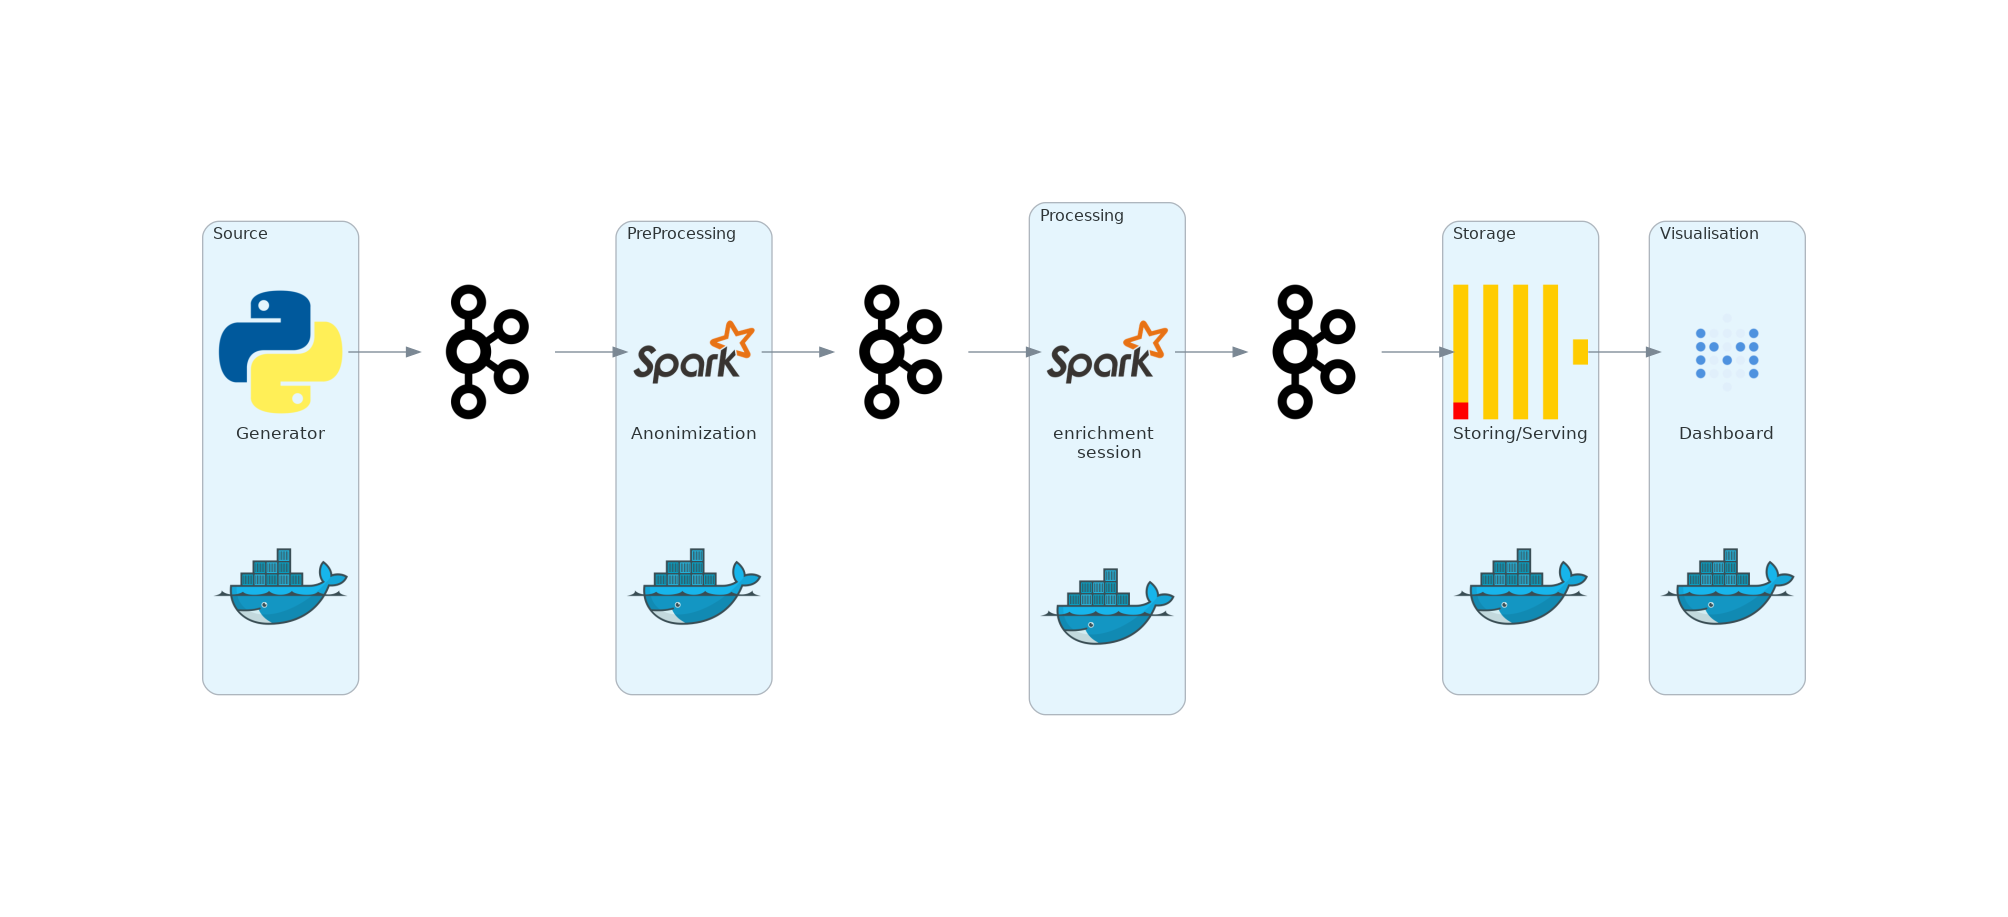

In [2]:
diag

In [79]:
!ls

dockerfile  project_pipeline.png  schemas.ipynb
